In [17]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [40]:
# Load the dataset
df = pd.read_csv(r"C:\Users\dell\Desktop\P\P_Projects\EDA\EHR\EHR.critical.stats.csv")

print(df.head())

   patientunitstayid  patienthealthsystemstayid gender  age  ethnicity  \
0             210014                     182373   Male   45  Caucasian   
1             200026                     174624   Male   50  Caucasian   
2             221131                     190993   Male   83  Caucasian   
3             221215                     191054   Male   49  Caucasian   
4             217835                     188445   Male   57  Caucasian   

   hospitalid  wardid                                  apacheadmissiondx  \
0          73      89  Hypertension, uncontrolled (for cerebrovascula...   
1          71      87  Ablation or mapping of cardiac conduction pathway   
2          71      87                            Endarterectomy, carotid   
3          71      87                  Infarction, acute myocardial (MI)   
4          73      92        CABG alone, coronary artery bypass grafting   

   admissionheight hospitaladmittime24  ...       unitadmitsource  \
0            178.0           

In [41]:
# Check for missing values
print(df.isnull().sum())

patientunitstayid              0
patienthealthsystemstayid      0
gender                         0
age                            0
ethnicity                     42
hospitalid                     0
wardid                         0
apacheadmissiondx            180
admissionheight               45
hospitaladmittime24            0
hospitaladmitoffset            0
hospitaladmitsource          229
hospitaldischargeyear          0
hospitaldischargetime24        0
hospitaldischargeoffset        0
hospitaldischargelocation      8
hospitaldischargestatus        7
unittype                       0
unitadmittime24                0
unitadmitsource               19
unitvisitnumber                0
unitstaytype                   0
admissionweight              134
dischargeweight              576
unitdischargetime24            0
unitdischargeoffset            0
unitdischargelocation          5
unitdischargestatus            2
uniquepid                      0
dtype: int64


In [ ]:
# Fill missing values in the target column
df['hospitaldischargestatus'].fillna('Unknown', inplace=True)

# Fill missing values in numeric columns with the median
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [29]:
# Print summary of missing values
print(df.isnull().sum())


patientunitstayid              0
patienthealthsystemstayid      0
gender                         0
age                            0
ethnicity                     42
hospitalid                     0
wardid                         0
apacheadmissiondx            180
admissionheight                0
hospitaladmittime24            0
hospitaladmitoffset            0
hospitaladmitsource          229
hospitaldischargeyear          0
hospitaldischargetime24        0
hospitaldischargeoffset        0
hospitaldischargelocation      8
hospitaldischargestatus        0
unittype                       0
unitadmittime24                0
unitadmitsource               19
unitvisitnumber                0
unitstaytype                   0
admissionweight                0
dischargeweight                0
unitdischargetime24            0
unitdischargeoffset            0
unitdischargelocation          5
unitdischargestatus            2
uniquepid                      0
dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_23872\2419196280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hospitaldischargestatus'].fillna('Unknown', inplace=True)


In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
df['hospitaldischargestatus'] = label_encoder.fit_transform(df['hospitaldischargestatus'])

# Save the label encoder for decoding later
joblib.dump(label_encoder, 'label_encoder.joblib')

In [ ]:
# One-hot encode categorical variables
categorical_features = ['gender', 'ethnicity']  # Modify based on your dataset
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_features = encoder.fit_transform(df[categorical_features])

In [ ]:
# Convert to DataFrame and add column names
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Save the encoder
joblib.dump(encoder, 'onehot_encoder.joblib')

In [30]:
# Drop original categorical columns and concatenate encoded data
df = df.drop(columns=categorical_features)
df = pd.concat([df, encoded_df], axis=1)

# Save feature names for inference step
joblib.dump(df.columns.tolist(), 'feature_names.joblib')


C:\Users\dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['feature_names.joblib']

In [31]:
# Define features (X) and target (y)
X = df.drop(columns=['hospitaldischargestatus'])
y = df['hospitaldischargestatus']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and test data
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (1157, 36)
Testing Data Shape: (290, 36)


In [32]:
# Train RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'random_forest_model.joblib')

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


ValueError: could not convert string to float: 'Diabetic ketoacidosis'

In [33]:
# Check data types of X_train
print(X_train.dtypes)

# Find any non-numeric columns
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


patientunitstayid               int64
patienthealthsystemstayid       int64
age                             int64
hospitalid                      int64
wardid                          int64
apacheadmissiondx              object
admissionheight               float64
hospitaladmittime24            object
hospitaladmitoffset             int64
hospitaladmitsource            object
hospitaldischargeyear           int64
hospitaldischargetime24        object
hospitaldischargeoffset         int64
hospitaldischargelocation      object
unittype                       object
unitadmittime24                object
unitadmitsource                object
unitvisitnumber                 int64
unitstaytype                   object
admissionweight               float64
dischargeweight               float64
unitdischargetime24            object
unitdischargeoffset             int64
unitdischargelocation          object
unitdischargestatus            object
uniquepid                      object
gender_Femal

In [ ]:
# Identify categorical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# One-hot encode all categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_features = encoder.fit_transform(df[categorical_features])

In [ ]:
# Convert to DataFrame and add column names
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Save the encoder
joblib.dump(encoder, 'onehot_encoder.joblib')

In [34]:
# Drop original categorical columns and concatenate encoded data
df = df.drop(columns=categorical_features)
df = pd.concat([df, encoded_df], axis=1)

# Save feature names
joblib.dump(df.columns.tolist(), 'feature_names.joblib')


C:\Users\dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['feature_names.joblib']

In [ ]:
# Define features and target
X = df.drop(columns=['hospitaldischargestatus'])
y = df['hospitaldischargestatus']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'random_forest_model.joblib')

In [35]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.98


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       269
           1       1.00      0.74      0.85        19
           2       0.00      0.00      0.00         2

    accuracy                           0.98       290
   macro avg       0.66      0.58      0.61       290
weighted avg       0.97      0.98      0.97       290

Confusion Matrix:
 [[269   0   0]
 [  5  14   0]
 [  2   0   0]]


C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Training Accuracy: 1.00
Test Accuracy: 0.98


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances
indices = np.argsort(feature_importances)[::-1]

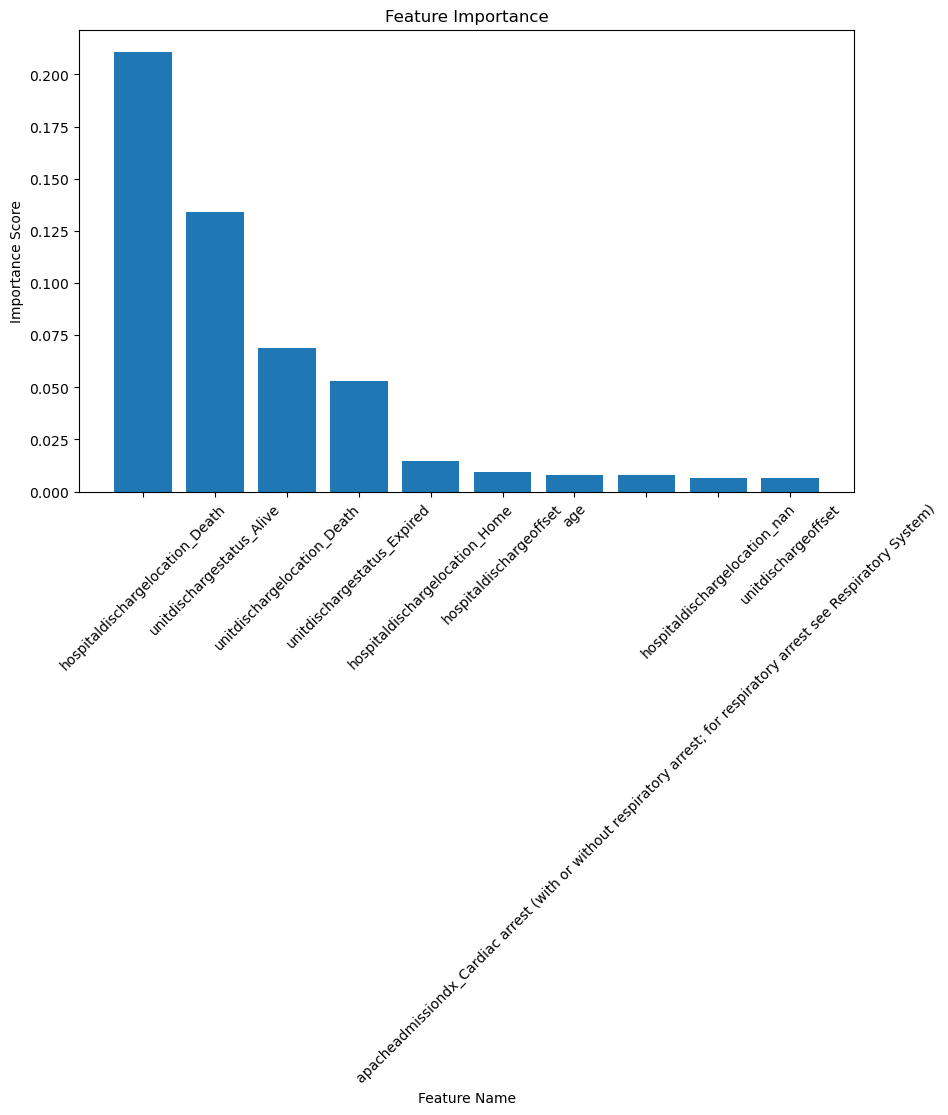

In [38]:
# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(10), feature_importances[indices][:10], align="center")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
# Load new patient data (make sure it has the same preprocessing as training data)
new_data = pd.read_csv("new_patient_data.csv")

# Load the encoder and transform categorical data
encoder = joblib.load('onehot_encoder.joblib')
categorical_features = new_data.select_dtypes(include=['object']).columns
encoded_new_data = encoder.transform(new_data[categorical_features])

# Drop original categorical columns and merge with numerical data
new_data = new_data.drop(columns=categorical_features)
new_data = np.hstack([new_data.values, encoded_new_data])

# Load trained model and predict
prediction = loaded_model.predict(new_data)
print("Predicted Discharge Status:", prediction)